In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from helpers import *

# Merging old dataset with just few columns of the new ones (likes in particular)

In [2]:
#merged = pd.read_csv(access_folder('generated') + 'merged_tweets.csv')

tweets1 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_1.csv')
tweets2 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_2.csv')
tweets3 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_3.csv')
tweets4 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_4.csv')
tweets5 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_5.csv')
tweets6 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_6.csv')
tweets7 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_7.csv')
tweets8 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_8.csv')
tweets9 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_9.csv')

old = pd.concat([tweets1,tweets2,tweets3,tweets4,tweets5,tweets6,tweets7,tweets8,tweets9], axis=0)

del tweets1,tweets2,tweets3,tweets4,tweets5,tweets6,tweets7,tweets8,tweets9

In [3]:
old.head(2)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll


In [4]:
old = old.drop(['external_author_id', 'region', 'harvested_date', 'updates', 'new_june_2018', 'account_type'],axis=1)

In [5]:
old.rename(columns = {'content':'tweet_text'}, inplace = True)

In [6]:
old.head(1)

,author,tweet_text,language,publish_date,following,followers,post_type,retweet,account_category
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",English,10/1/2017 19:58,1052,9636,NaN,0,RightTroll


### Filtering by date and language (election day not included)

In [7]:
old['publish_date'] = pd.to_datetime(old['publish_date'], format='%m/%d/%Y %H:%M')
old = old[old.language == 'English' ]
old = old[(old.publish_date > '2015-08') & (old.publish_date < '2016-11-08')]
old.shape

(896975, 9)

##### Grouping by content highlights only the unique tweets

In [8]:
gpo = old.groupby('tweet_text').sum()
gpo.shape

(699924, 3)

### New dataset, saving only some columns

In [9]:
new = pd.read_csv(access_folder('generated') + 'FINAL_DF_WITH_TOPICS.csv', index_col=0)

C:\Users\utente\Anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6,12,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
new = new[['tweet_text', 'hashtags', 'topic', 'topic_scores', 'reply_count', 'like_count', 'retweet_count', 'user_mentions']]
new.shape

(638046, 8)

In [11]:
new.head(2)

,tweet_text,hashtags,topic,topic_scores,reply_count,like_count,retweet_count,user_mentions
0,#FoodPoisoning is not a joke! #Walmart #KochFa...,"[FoodPoisoning, Walmart, KochFarms]",Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...,0,0,15,NaN
1,#FoodPoisoning is not a joke! #Walmart #KochFa...,"[FoodPoisoning, Walmart, KochFarms]",Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...,0,0,15,NaN


In [12]:
gp = new.groupby('tweet_text').sum()
print(gp.shape)
gp.head()

(358060, 3)


,reply_count,like_count,retweet_count
tweet_text,,,
!!!!!!! A LIL LOUDER FOR THE WHITE FEMINISTS IN THE BACK https://t.co/Bui3f3S0sq,1,79,65
!!!!!!!! Great comment. At least we can fire 'em https://t.co/bc01nVr79o,0,2,10
!!!I I was getting to the place for an hour instead of 15 minutes. Just HOW... Like every pupil is driver lol https://t.co/H3IjhSRzao,0,16,8
!!!WARNING!!!GRAPHIC CONTENT!!! Footage allegedly shows #Kurdish civilians being shot by Turkish military #Cizre https://t.co/a1nBKKs3rn,4,15,70
"!#RejectedTimeCapsuleItems Apparently, a time bomb http://t.co/safoMy1Az2",1,0,1


In [13]:
new[new.tweet_text == "Wow. Hadn't thought of it that way but that's exactly what is happening. So true. #BlackLivesMatter https://t.co/ACxots9JCA"]

,tweet_text,hashtags,topic,topic_scores,reply_count,like_count,retweet_count,user_mentions
521090,Wow. Hadn't thought of it that way but that's ...,[BlackLivesMatter],Black Support,[ -7.8478956 -8.217757 -7.6867266 -4.57260...,90,11709,13316,NaN
521091,Wow. Hadn't thought of it that way but that's ...,[BlackLivesMatter],Black Support,[ -7.8478956 -8.217757 -7.6867266 -4.57260...,90,11709,13316,NaN
521092,Wow. Hadn't thought of it that way but that's ...,[BlackLivesMatter],Black Support,[ -7.8478956 -8.217757 -7.6867266 -4.57260...,90,11709,13316,NaN
521093,Wow. Hadn't thought of it that way but that's ...,[BlackLivesMatter],Black Support,[ -7.8478956 -8.217757 -7.6867266 -4.57260...,90,11709,13316,NaN
521094,Wow. Hadn't thought of it that way but that's ...,[BlackLivesMatter],Black Support,[ -7.8478956 -8.217757 -7.6867266 -4.57260...,90,11709,13316,NaN
521095,Wow. Hadn't thought of it that way but that's ...,[BlackLivesMatter],Black Support,[ -7.8478956 -8.217757 -7.6867266 -4.57260...,90,11709,13316,NaN
521096,Wow. Hadn't thought of it that way but that's ...,[BlackLivesMatter],Black Support,[ -7.8478956 -8.217757 -7.6867266 -4.57260...,90,11709,13316,NaN


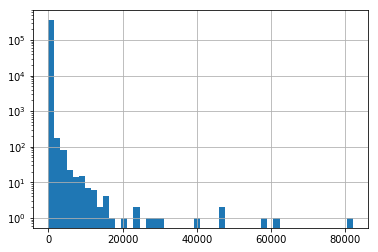

In [14]:
gp.like_count.hist(log=True, bins=50)

In [15]:
partitioned_likes = gp.div(new.groupby('tweet_text').count().like_count.values, axis=0)

In [16]:
partitioned_likes[partitioned_likes.index == "Wow. Hadn't thought of it that way but that's exactly what is happening. So true. #BlackLivesMatter https://t.co/ACxots9JCA"]

,reply_count,like_count,retweet_count
tweet_text,,,
Wow. Hadn't thought of it that way but that's exactly what is happening. So true. #BlackLivesMatter https://t.co/ACxots9JCA,90.0,11709.0,13316.0


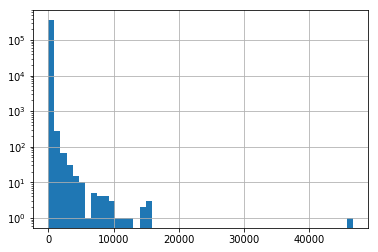

In [17]:
partitioned_likes.like_count.hist(bins=50, log=True)

##### partitioned_likes is the counts variables divided by the amount of tweets there are of the same content, in order to put them again in the old dataset with an equal repartition

### How many tweets are shared between old and new?

In [18]:
shared_content = list(set(gp.index) & set(old.tweet_text.values))
len(shared_content)

358060

##### extract the shared content from old

In [19]:
shared = old[old.tweet_text.isin(shared_content)]
shared.shape

(411853, 9)

In [20]:
shared.head(2)

,author,tweet_text,language,publish_date,following,followers,post_type,retweet,account_category
425,1D_NICOLE_,#FoodPoisoning is not a joke! #Walmart #KochFa...,English,2015-11-26 22:20:00,48,40,RETWEET,1,Fearmonger
426,1D_NICOLE_,Thanks God that #turkey i ate few days ago was...,English,2015-11-26 22:35:00,48,40,RETWEET,1,Fearmonger


##### add the counts columns

In [21]:
d = pd.DataFrame({'col1': [1, 1, 2], 'col2': [3, 4, 44], 'col3': [5, 6, 66]})
d = d.set_index('col1')
d

,col2,col3
col1,,
1,3,5
1,4,6
2,44,66


In [22]:
e = pd.DataFrame({'col1': [1, 2], 'col2': [0, 44]})
e = e.set_index('col1')
e

,col2
col1,
1,0
2,44


In [23]:
d.merge(e, how='left', on='col1')

,col2_x,col3,col2_y
col1,,,
1,3,5,0
1,4,6,0
2,44,66,44


In [24]:
sha = shared.set_index('tweet_text')
merged = sha.merge(partitioned_likes,  how='left', on = 'tweet_text')

In [25]:
merged.shape

(411853, 11)

##### add the predictions and others...

In [26]:
new.set_index('tweet_text', inplace=True)

In [27]:
new.head(4)

,hashtags,topic,topic_scores,reply_count,like_count,retweet_count,user_mentions
tweet_text,,,,,,,
#FoodPoisoning is not a joke! #Walmart #KochFarms https://t.co/o4i3tFAEgv https://t.co/pv5lmkdWgE,"[FoodPoisoning, Walmart, KochFarms]",Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...,0,0,15,NaN
#FoodPoisoning is not a joke! #Walmart #KochFarms https://t.co/o4i3tFAEgv https://t.co/pv5lmkdWgE,"[FoodPoisoning, Walmart, KochFarms]",Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...,0,0,15,NaN
#FoodPoisoning is not a joke! #Walmart #KochFarms https://t.co/o4i3tFAEgv https://t.co/pv5lmkdWgE,"[FoodPoisoning, Walmart, KochFarms]",Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...,0,0,15,NaN
#FoodPoisoning is not a joke! #Walmart #KochFarms https://t.co/o4i3tFAEgv https://t.co/pv5lmkdWgE,"[FoodPoisoning, Walmart, KochFarms]",Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...,0,0,15,NaN


##### Removing duplicate content, only to get one topic+hashtags+topic_scores per content (since they share the same columns content)

In [28]:
dropped_dup = new[~new.index.duplicated(keep='first')]
dropped_dup.drop(['reply_count', 'like_count', 'retweet_count', 'user_mentions'],axis=1, inplace=True)
dropped_dup.head(4)

C:\Users\utente\Anaconda3\envs\ada\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,hashtags,topic,topic_scores
tweet_text,,,
#FoodPoisoning is not a joke! #Walmart #KochFarms https://t.co/o4i3tFAEgv https://t.co/pv5lmkdWgE,"[FoodPoisoning, Walmart, KochFarms]",Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...
Thanks God that #turkey i ate few days ago was good. #KochFarms https://t.co/HSSve9bLt1 https://t.co/qR0Ykj3xyZ,"[turkey, KochFarms]",Patriot,[ -9.862805 -4.7526827 4.4411793 -10.09800...
"When we first met, I had no idea you’d become this important to me.",[],Black Support,[ 2.1860437 -4.266829 -7.4841847 -4.18709...
I want my little parrot to speak at last!!! #DumbGenieWishes,[DumbGenieWishes],Trump Support,[-5.468153 -3.8110754 0.38878125 -7.120957...


In [29]:
final = merged.merge(dropped_dup,  how='left', on = 'tweet_text')
final.shape

(411853, 14)

In [30]:
final['tweet_text'] = final.index
final.index = np.arange(1, len(final) + 1)
final.drop('language', axis=1, inplace=True)

##### Removing the column retweet since the column post_type is more informative

In [32]:
final.head()

,author,publish_date,following,followers,post_type,retweet,account_category,reply_count,like_count,retweet_count,hashtags,topic,topic_scores,tweet_text
1,1D_NICOLE_,2015-11-26 22:20:00,48,40,RETWEET,1,Fearmonger,0.0,0.0,15.0,"[FoodPoisoning, Walmart, KochFarms]",Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...,#FoodPoisoning is not a joke! #Walmart #KochFa...
2,1D_NICOLE_,2015-11-26 22:35:00,48,40,RETWEET,1,Fearmonger,1.0,0.0,20.0,"[turkey, KochFarms]",Patriot,[ -9.862805 -4.7526827 4.4411793 -10.09800...,Thanks God that #turkey i ate few days ago was...
3,1D_NICOLE_,2015-09-06 15:26:00,59,53,TWEET,0,Fearmonger,0.0,0.0,0.0,[DumbGenieWishes],Trump Support,[-5.468153 -3.8110754 0.38878125 -7.120957...,I want my little parrot to speak at last!!! #D...
4,1D_NICOLE_,2015-09-06 15:30:00,59,53,TWEET,0,Fearmonger,0.0,0.5,0.0,[DumbGenieWishes],Black Support,[-3.9203706 -1.6616256 -0.85534257 -3.182626...,An everyday changing funny church sign #DumbGe...
5,1D_NICOLE_,2015-09-06 15:33:00,59,53,TWEET,0,Fearmonger,0.0,0.5,0.0,"[YoLandi, DumbGenieWishes]",Black Support,[-7.635078 -1.9815104 -0.70070666 -4.231632...,I wish look like #YoLandi #DumbGenieWishes


In [33]:
final.post_type.fillna('TWEET', inplace=True)
final.drop('retweet', inplace=True, axis=1)
final.post_type.value_counts()

TWEET          374547
RETWEET         31094
QUOTE_TWEET      6212
Name: post_type, dtype: int64

In [34]:
final.head(5)

,author,publish_date,following,followers,post_type,account_category,reply_count,like_count,retweet_count,hashtags,topic,topic_scores,tweet_text
1,1D_NICOLE_,2015-11-26 22:20:00,48,40,RETWEET,Fearmonger,0.0,0.0,15.0,"[FoodPoisoning, Walmart, KochFarms]",Trump Support,[-8.1184225 -4.818271 -2.6408563 -0.574982...,#FoodPoisoning is not a joke! #Walmart #KochFa...
2,1D_NICOLE_,2015-11-26 22:35:00,48,40,RETWEET,Fearmonger,1.0,0.0,20.0,"[turkey, KochFarms]",Patriot,[ -9.862805 -4.7526827 4.4411793 -10.09800...,Thanks God that #turkey i ate few days ago was...
3,1D_NICOLE_,2015-09-06 15:26:00,59,53,TWEET,Fearmonger,0.0,0.0,0.0,[DumbGenieWishes],Trump Support,[-5.468153 -3.8110754 0.38878125 -7.120957...,I want my little parrot to speak at last!!! #D...
4,1D_NICOLE_,2015-09-06 15:30:00,59,53,TWEET,Fearmonger,0.0,0.5,0.0,[DumbGenieWishes],Black Support,[-3.9203706 -1.6616256 -0.85534257 -3.182626...,An everyday changing funny church sign #DumbGe...
5,1D_NICOLE_,2015-09-06 15:33:00,59,53,TWEET,Fearmonger,0.0,0.5,0.0,"[YoLandi, DumbGenieWishes]",Black Support,[-7.635078 -1.9815104 -0.70070666 -4.231632...,I wish look like #YoLandi #DumbGenieWishes


##### Changing topics' names

In [35]:
final.topic.value_counts()

Trump Support        93910
Sports               84079
Black Support        68307
Entertainment        52155
Health               37749
Crime                21316
Anti-Islam           17781
Foreign Countries    13848
Anti-Trump           13405
Patriot               8825
Fukushima              478
Name: topic, dtype: int64

In [36]:
final.topic = final.topic.replace({'Trump Support':'Trump',\
                                   'Black Support':'Black',\
                                   'Anti-Islam': 'Islam',\
                                   'Anti-Trump': 'Trump Adversaries'})
final.topic.value_counts()

Trump                93910
Sports               84079
Black                68307
Entertainment        52155
Health               37749
Crime                21316
Islam                17781
Foreign Countries    13848
Trump Adversaries    13405
Patriot               8825
Fukushima              478
Name: topic, dtype: int64

In [37]:
final.head()

,author,publish_date,following,followers,post_type,account_category,reply_count,like_count,retweet_count,hashtags,topic,topic_scores,tweet_text
1,1D_NICOLE_,2015-11-26 22:20:00,48,40,RETWEET,Fearmonger,0.0,0.0,15.0,"[FoodPoisoning, Walmart, KochFarms]",Trump,[-8.1184225 -4.818271 -2.6408563 -0.574982...,#FoodPoisoning is not a joke! #Walmart #KochFa...
2,1D_NICOLE_,2015-11-26 22:35:00,48,40,RETWEET,Fearmonger,1.0,0.0,20.0,"[turkey, KochFarms]",Patriot,[ -9.862805 -4.7526827 4.4411793 -10.09800...,Thanks God that #turkey i ate few days ago was...
3,1D_NICOLE_,2015-09-06 15:26:00,59,53,TWEET,Fearmonger,0.0,0.0,0.0,[DumbGenieWishes],Trump,[-5.468153 -3.8110754 0.38878125 -7.120957...,I want my little parrot to speak at last!!! #D...
4,1D_NICOLE_,2015-09-06 15:30:00,59,53,TWEET,Fearmonger,0.0,0.5,0.0,[DumbGenieWishes],Black,[-3.9203706 -1.6616256 -0.85534257 -3.182626...,An everyday changing funny church sign #DumbGe...
5,1D_NICOLE_,2015-09-06 15:33:00,59,53,TWEET,Fearmonger,0.0,0.5,0.0,"[YoLandi, DumbGenieWishes]",Black,[-7.635078 -1.9815104 -0.70070666 -4.231632...,I wish look like #YoLandi #DumbGenieWishes


In [39]:
final.to_csv('Final_dataset.csv')

# other stuff

In [ ]:
import requests
from bs4 import BeautifulSoup
import lxml

#https://en.wikipedia.org/wiki/List_of_largest_cities_of_U.S._states_and_territories_by_population
# Scrape wikipedia table for american cities and states
website = requests.get('https://simple.wikipedia.org/wiki/List_of_U.S._states%27_largest_cities').text
soup = BeautifulSoup(website,'html.parser')
My_table = soup.find('table',{'class':'wikitable sortable mw-collapsible'})
links = My_table.find_all('a')

places = []
for link in links:
    places.append(link.get('title'))
    
city_clean = list(filter(None.__ne__, places)) # Drop None values
cities = {}


for entry in city_clean:
    split=entry.split(', ')
    if len(split) == 1:
        cities[split[0]] = []
    else:
        if split[1] in cities.keys():
            cities[split[1]].append(split[0]) 
state_n_city = []
for state in cities.keys():
    state_list = []
    state_cities = cities[state]
    for city in state_cities:
        state_list.append(city + '|' + city.lower())
    state_list.append(state + '|' + state.lower())
    state_list = '|'.join(state_list)
    state_n_city.append([state, state_list])
    
state_n_city_dict = {}
for state in state_n_city:
    state_n_city_dict[state[0]] = state[1]

state_n_city_dict['Georgia (U.S. state)'] += '|Georgia|georgia'

In [ ]:
state_n_city_dict

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(final.author.value_counts())

### Checkin benja dataset

In [ ]:
ben = pd.read_csv(access_folder('generated')+'final_merged_tweets.csv')
ben.head()

In [ ]:
ben['publish_date'] = pd.to_datetime(ben['publish_date'], format='%Y-%m-%d %H:%M:%S')
ben = ben[(ben.publish_date > '2015-08') & (ben.publish_date < '2016-11-08')]
ben.shape